In [19]:
#HEART ATTACK PREDICTION USING KNN 
#DATASET FROM KAGGLE

#STEP 1: LOADING DATA SET
import pandas as pd
import numpy as np
df=pd.read_csv('heart_attack.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
#STEP 2: exploring dataset shape,size,dimension,missing values
df.shape
df.size
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
#data has no missing value
#STEP 3: checking data types
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
#every value is numeric

In [23]:
#STEP 4: SPLITTING INPUT AND OUTPUT AS ARRAYS ON x and y

x=df.iloc[:,:-1].values
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]], shape=(303, 13))

In [24]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
#STEP 5 : CHECKING DIMENSION OF X AND Y

x.ndim




2

In [26]:
y.ndim

1

In [27]:
#STEP 6: SPLITTING DATA INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [28]:
#checking x_train,y_train,x_test,y_test
x_train



array([[62.,  1.,  1., ...,  2.,  0.,  2.],
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       [61.,  1.,  0., ...,  2.,  1.,  3.],
       ...,
       [56.,  1.,  3., ...,  1.,  0.,  3.],
       [47.,  1.,  2., ...,  2.,  0.,  2.],
       [58.,  1.,  1., ...,  1.,  0.,  2.]], shape=(212, 13))

In [29]:
x_test





array([[70.,  1.,  0., ...,  0.,  0.,  3.],
       [64.,  1.,  3., ...,  1.,  0.,  3.],
       [59.,  1.,  3., ...,  1.,  0.,  3.],
       ...,
       [51.,  1.,  2., ...,  1.,  0.,  2.],
       [67.,  1.,  0., ...,  1.,  0.,  2.],
       [77.,  1.,  0., ...,  2.,  3.,  2.]], shape=(91, 13))

In [30]:
y_train



array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [31]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

In [32]:
#STEP 7: NORMALIZING AND SCALING

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [33]:
#loading 
x_train



array([[ 0.835114  ,  0.73989544,  0.0315114 , ...,  0.955317  ,
        -0.69264875, -0.42921768],
       [ 1.61651954,  0.73989544,  1.94020175, ..., -0.67796691,
         0.29286491, -0.42921768],
       [ 0.72348464,  0.73989544, -0.92283378, ...,  0.955317  ,
         0.29286491,  1.13964695],
       ...,
       [ 0.16533783,  0.73989544,  1.94020175, ..., -0.67796691,
        -0.69264875,  1.13964695],
       [-0.83932643,  0.73989544,  0.98585657, ...,  0.955317  ,
        -0.69264875, -0.42921768],
       [ 0.38859655,  0.73989544,  0.0315114 , ..., -0.67796691,
        -0.69264875, -0.42921768]], shape=(212, 13))

In [34]:
x_test

array([[ 1.7281489 ,  0.73989544, -0.92283378, ..., -2.31125082,
        -0.69264875,  1.13964695],
       [ 1.05837272,  0.73989544,  1.94020175, ..., -0.67796691,
        -0.69264875,  1.13964695],
       [ 0.50022591,  0.73989544,  1.94020175, ..., -0.67796691,
        -0.69264875,  1.13964695],
       ...,
       [-0.39280898,  0.73989544,  0.98585657, ..., -0.67796691,
        -0.69264875, -0.42921768],
       [ 1.39326081,  0.73989544, -0.92283378, ..., -0.67796691,
        -0.69264875, -0.42921768],
       [ 2.50955443,  0.73989544, -0.92283378, ...,  0.955317  ,
         2.26389222, -0.42921768]], shape=(91, 13))

In [35]:
#STEP 8: ALGORITHM IMPLEMENTATION

from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

In [36]:
#STEP 9: CHECK IF MODEL PREDICTS WHEN WE GIVE RANDOM VALUE
print(knn_model.predict(scaler.transform([[29,1,1,135,200,0,0,150,0,2,1,0,1]])))

[1]


In [37]:
#STEP 10: CHECKING ON PERFORMANCE EVALUATION WITH CONFUSION MATRIX AND ACCURACY SCORE

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[33, 11],
       [ 4, 43]])

In [38]:
#displaying confusion matrix
#labels order check from y_train

y_train

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

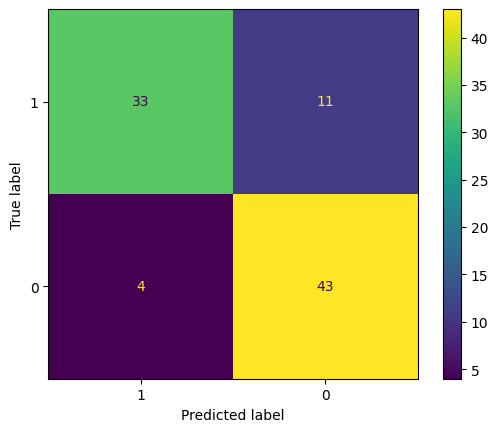

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
labels=[1,0]
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [40]:
#accuracy score

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8351648351648352

In [41]:
#STEP : CLASSIFICATION REPORT based on training and testing data , not entire data
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

